# Customer Churn Prediction Using Artificial Neural Network (ANN)

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the Data

In [59]:
df=pd.read_csv(r"D:\Project\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2261,3126-WQMGH,Female,0,Yes,No,49,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),52.15,2583.75,No
3411,7056-IMHCC,Male,1,Yes,No,53,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.90,5549.4,Yes
6575,2978-XXSOG,Female,0,No,No,22,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,59.05,1253.5,No
4947,4735-ASGMA,Male,0,No,No,26,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.35,2515.3,Yes
3469,9402-ORRAH,Female,1,No,No,15,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,91.50,1400.3,No


# EDA and Data Cleaning

In [60]:
df.shape

(7043, 21)

Let's drop the customerID column as it is of no use

In [61]:
df.drop('customerID',axis=1,inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We can see the column TotalCharges is in 'object' datatype.So, we need to convert it into numeric datatype

In [62]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

It is clear that TotalCharges are in 'string' datatype.

In [63]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

Something went wrong. Some of the values in the column are blank strings. Let's find them out

In [96]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [97]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [98]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

Let's remove the rows with blank 'TotalCharges' values

In [99]:
df1=df[df.TotalCharges!=" "]
df1.shape

(7032, 20)

In [100]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)
df1.TotalCharges.dtype

dtype('float64')

In [101]:
#Let's check for Null values
df1.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [102]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


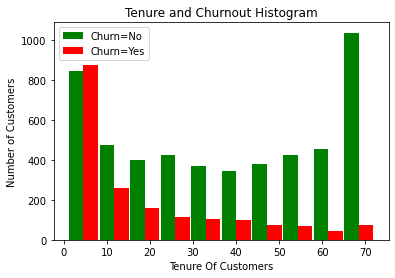

In [122]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure

plt.title('Tenure and Churnout Histogram')
plt.xlabel('Tenure Of Customers')
plt.ylabel('Number of Customers')

plt.hist([tenure_churn_no,tenure_churn_yes],rwidth=0.95,color=['green','red'],label=['Churn=No','Churn=Yes'])
plt.legend()


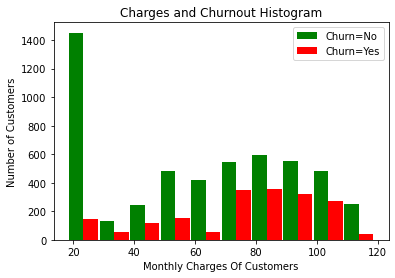

In [123]:
tenure_churn_no=df1[df1.Churn=='No'].MonthlyCharges
tenure_churn_yes=df1[df1.Churn=='Yes'].MonthlyCharges

plt.title('Charges and Churnout Histogram')
plt.xlabel('Monthly Charges Of Customers')
plt.ylabel('Number of Customers')

plt.hist([tenure_churn_no,tenure_churn_yes],rwidth=0.95,color=['green','red'],label=['Churn=No','Churn=Yes'])
plt.legend()

Many of the columns are Yes,No columns. Let's print unique values in Object columns

In [124]:
for column in df1:
     if(df1[column].dtypes=='object'):
        print(column,':',df1[column].unique())


Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


Some of the columns have no internet service or no phone service, that can be replaced with a simple No

In [125]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [126]:
#Let's check
for column in df1:
     if(df1[column].dtypes=='object'):
        print(column,':',df1[column].unique())


Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [127]:
yes_no_cols=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for i in yes_no_cols:
    df1[i].replace({'Yes':1,'No':0},inplace=True)
df1.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1030,1,0,1,1,50,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Bank transfer (automatic),69.75,3557.70,0
4356,1,0,0,0,3,1,0,No,0,0,0,0,0,0,Month-to-month,0,Mailed check,18.80,56.00,0
2619,1,1,0,0,33,1,1,Fiber optic,0,1,1,1,1,1,Month-to-month,1,Electronic check,110.45,3655.45,1
913,0,0,0,0,12,1,0,No,0,0,0,0,0,0,One year,0,Credit card (automatic),20.05,267.00,0
5468,1,0,0,0,7,1,0,Fiber optic,0,0,0,0,1,0,Month-to-month,1,Electronic check,79.70,586.05,1


<AxesSubplot:xlabel='TechSupport', ylabel='count'>

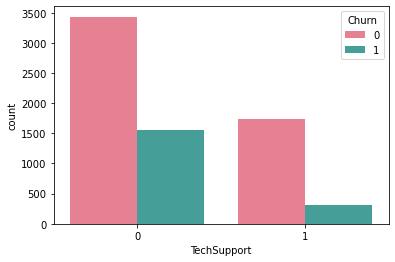

In [128]:
sns.countplot(data=df1,x='TechSupport',hue='Churn',palette='husl')

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

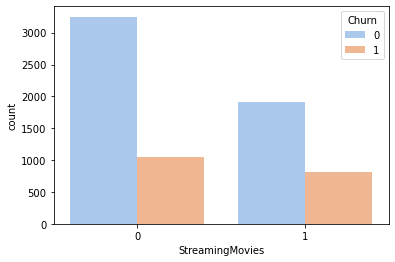

In [129]:
sns.countplot(data=df1,x='StreamingMovies',hue='Churn',palette='pastel')

In [130]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [131]:
df1['gender'].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='gender', ylabel='count'>

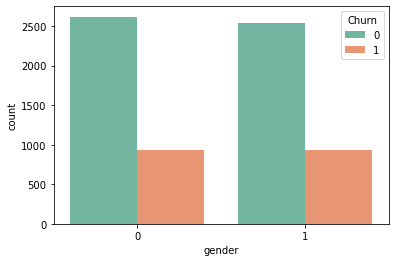

In [132]:
sns.countplot(data=df1,x='gender',hue='Churn',palette='Set2')

# One Hot Encoding

In [133]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3670,1,0,1,1,33,1,1,0,0,0,...,0,0,1,1,0,0,1,0,0,0
4778,0,0,0,1,62,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3661,1,0,0,0,51,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
3142,0,0,0,0,1,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
6997,1,0,1,0,27,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0


In [134]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

# Scaling

In [135]:
cols_to_scale=['tenure','TotalCharges','MonthlyCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [136]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6160,1,0,0,0,0.492958,1,1,1,0,1,...,1,0,0,0,1,0,0,1,0,0
1348,0,0,1,0,0.126761,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
6014,1,0,0,0,0.746479,1,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
6113,0,0,0,0,0.281690,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
6476,0,0,1,1,0.732394,1,1,1,1,0,...,1,0,0,0,1,0,1,0,0,0


# Splitting the dataset

In [137]:
x=df2.drop('Churn',axis=1)
y=df2.Churn

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=3)

In [138]:
print('x_train shape:',x_train.shape)
print('y_train shape:',y_train.shape)
print('x_test shape:',x_test.shape)
print('y_test shape:',y_test.shape)

x_train shape: (5625, 26)
y_train shape: (5625,)
x_test shape: (1407, 26)
y_test shape: (1407,)


In [139]:
x_train[:8]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5993,0,0,0,0,0.014085,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
6405,1,1,0,0,0.830986,1,1,1,0,0,...,0,1,0,0,1,0,1,0,0,0
3683,0,0,1,0,0.985915,1,0,1,0,0,...,1,0,0,0,0,1,1,0,0,0
7011,1,0,0,0,0.042254,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
4114,1,0,1,1,0.704225,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
802,0,0,1,1,0.535211,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1279,0,0,1,0,0.338028,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
6921,0,0,0,0,0.746479,1,1,0,1,0,...,0,1,0,1,0,0,1,0,0,0


# Artificial Neural Network Model

In [140]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.5900 - accuracy: 0.6660
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4469 - accuracy: 0.7794
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4298 - accuracy: 0.7904
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4255 - accuracy: 0.7938
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4216 - accuracy: 0.7966
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4208 - accuracy: 0.7961
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4192 - accuracy: 0.8002
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4176 - accuracy: 0.8018
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4161 - accuracy: 0.8036
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4165 - accura

In [141]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4310 - accuracy: 0.7953


[0.43102753162384033, 0.7953091859817505]

In [142]:
yp=model.predict(x_test)
yp[:10]

44/44 [==============================] - 0s 2ms/step


array([[0.01179845],
       [0.8715813 ],
       [0.22311735],
       [0.56411153],
       [0.42247483],
       [0.00294898],
       [0.52119213],
       [0.27295882],
       [0.6175207 ],
       [0.16573729]], dtype=float32)

In [143]:
y_test[:10]

5580    0
3438    1
2175    1
4237    1
511     0
6769    0
5597    1
3468    0
4482    1
661     0
Name: Churn, dtype: int64

In [144]:
y_pred=[]
for i in yp:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred[:10]

[0, 1, 0, 1, 0, 0, 1, 0, 1, 0]

In [145]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1051
           1       0.61      0.54      0.57       356

    accuracy                           0.80      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



Text(123.0, 0.5, 'Truth')

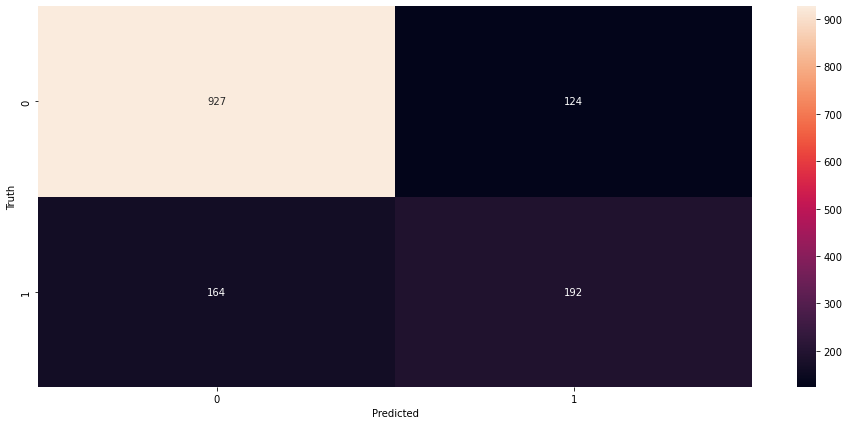

In [146]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize=(16,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [147]:
y_test.shape

(1407,)

# Accuracy

In [148]:
round((918+197)/1407,2)

0.79

# Precision for 0 class. i.e. Precision for customers who did not churn

In [149]:
round(918/(918+159),2)

0.85

# Precision for 1 class. i.e. Precision for customers who did  churn

In [150]:
round(197/(197+133),2)

0.6

# Recall for 0 class

In [151]:
round(918/(918+133),2)

0.87

# Recall for 1 class

In [152]:
round(197/(197+159),2)

0.55

# THANK YOU!